<p style='text-align:center;
          font-family: sans-serif;
          font-weight:bold;
          color:black;
          font-size:40px;
          margin: 30px;'> Walmart Sales 
    <font color='#128EB3'; size='7'>Forecasting</font></p>
<p style="text-align:center;
          font-family: sans-serif;
          font-weight:bold;
          color:#616161;
          font-size:20px;
          margin: 30px;">EDA 📊</p>

<div style="width:100%;text-align: center;"> 
    <img align=middle src="https://www.saleshacker.com/wp-content/uploads/2017/05/sales-forecasting-metrics-1024x768.jpg" alt="Data Science" style="height:500px;margin-top:2rem;">
</div>

<h3 style="text-align: left; background-color: #128EB3; font-family:Trebuchet MS; color: white; padding: 14px; line-height: 1; border-radius:10px"> About Dataset📁</h3>

For this project we are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains many departments, and participants must project the sales for each department in each store.

The dataset essentially contains five csv files:

**stores.csv:**

This file contains anonymized information about the 45 stores, indicating the type and size of store.

**train.csv:**

Historical training data, which covers to 2010-02-05 to 2012-11-01. Within this file we will find the following fields:

* Store - store number
* Dept - department number
* Date - the week
* Weekly_Sales - sales for the given department in the given store
* IsHoliday - whether the week is a special holiday week

**features.csv**

This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:

* Store - the store number
* Date - the week
* Temperature - average temperature in the region
* Fuel_Price - cost of fuel in the region
* MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
* CPI - the consumer price index
* Unemployment - the unemployment rate
* IsHoliday - whether the week is a special holiday week

**test.csv**

This file is identical to train.csv, except we have withheld the weekly sales. You must predict the sales for each triplet of store, department, and date in this file.




<h3 style="text-align: left; background-color: #128EB3; font-family:Trebuchet MS; color: white; padding: 14px; line-height: 1; border-radius:10px"> Notebook goals🔎</h3>

In this first version of the project the objective will be: 

* Predicting store-level sales behavior through time series modeling with some of the libraries available in Python

* Generate a sales visualization and analysis tool using a BI solution

**Note: I have divided the project into several notebooks for each of the models used for sales forecasting. I leave the link below:**


* [Exploratory Data Analysis](https://www.kaggle.com/code/armandodelahoya/walmart-sales-forecasting-eda/notebook)
* [Prophet model](https://www.kaggle.com/code/armandodelahoya/walmart-sales-forecasting-prophet-model/notebook)
* [Neural prophet model](https://www.kaggle.com/code/armandodelahoya/walmart-sales-forecasting-neural-model/notebook)
* [PyCaret library](https://www.kaggle.com/code/armandodelahoya/walmart-sales-forecasting-pycaret-library/notebook)
* [Power BI Dashboard](https://app.powerbi.com/view?r=eyJrIjoiNWFjYWU0ZTktNjFiYS00Zjg3LTg0M2MtOTMzM2M0MjQ5OThmIiwidCI6IjAyNDlhNTcxLWI5YTItNGNhMi1iOTNiLTIwYzc3MDg4ZjA4YiJ9)
* [Github repository](https://github.com/ArmandoLazalde/Walmart-Sales-Forecasting)




<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #128EB3; font-family:Trebuchet MS; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>Table of Contents</b></h3>
    
* [1. Import necessary libraries](#1)
* [2. Exploratory Data Analysis](#2)
* [3. Conclusions](#3)

<a id="1"></a>
<h3 style="text-align: left;
           background-color: #128EB3;
           font-family:Trebuchet MS; 
           color: white; 
           padding: 14px; 
           line-height: 1; 
           border-radius:10px"> 1. Import necessary libraries
</h3>

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
from datetime import datetime
from zipfile import ZipFile

#plotly configuration
import plotly.express as px
import plotly.graph_objects as go

#matplotlib configuration
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

style.use("bmh")
plt.rcParams['font.family'] = 'Trebuchet MS'

matplotlib.rcParams['font.size'] = 15
#matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
with ZipFile('/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv.zip') as f:
    f.extractall(path='walmart-recruiting-store-sales-forecasting')
    
with ZipFile('/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip') as f:
    f.extractall(path='walmart-recruiting-store-sales-forecasting') 
    
with ZipFile('/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip') as f:
    f.extractall(path='walmart-recruiting-store-sales-forecasting') 
    
with ZipFile('/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip') as f:
    f.extractall(path='walmart-recruiting-store-sales-forecasting') 

In [3]:
train_df = pd.read_csv('/kaggle/working/walmart-recruiting-store-sales-forecasting/train.csv')
features_df = pd.read_csv('/kaggle/working/walmart-recruiting-store-sales-forecasting/features.csv')
stores_df = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv')
test_df = pd.read_csv('/kaggle/working/walmart-recruiting-store-sales-forecasting/test.csv')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [5]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [6]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [7]:
# Merge in one dataframe
data = train_df.merge(features_df, on=['Store', 'Date', 'IsHoliday'], how = 'inner')
final_df = data.merge(stores_df, on=['Store'], how='inner')
final_df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [8]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [9]:
print('Entries before merge in stores_df:',stores_df.shape[0], 'features_df:', features_df.shape[0], 'train_df:', train_df.shape[0])
print('Entries after merge:',final_df.shape[0])

Entries before merge in stores_df: 45 features_df: 8190 train_df: 421570
Entries after merge: 421570


In [10]:
final_df["Date"] = pd.to_datetime(final_df["Date"], dayfirst=True)

<a id="2"></a>
<h3 style="text-align: left;
           background-color: #128EB3;
           font-family:Trebuchet MS; 
           color: white; 
           padding: 14px; 
           line-height: 1; 
           border-radius:10px"> 2. Exploratory Data Analysis
</h3>

<AxesSubplot:>

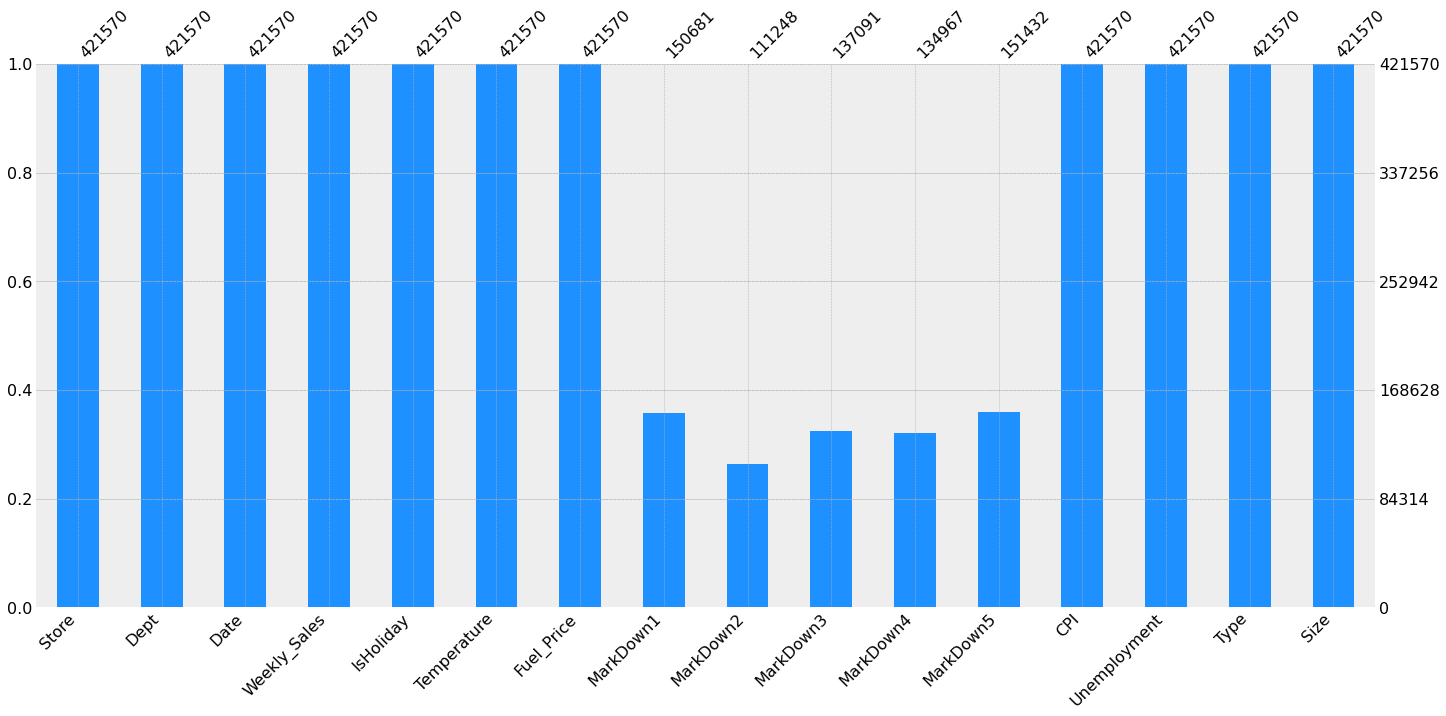

In [11]:
#Checking null values
msno.bar(final_df, color="dodgerblue")

In [12]:
#Null values by column percentege
final_df.isnull().mean().round(4)*100
#What is MarkDown
# https://retailminded.com/markdowns-vs-discounts-whats-the-difference-2/#.ZAlVrBWZPIU

Store            0.00
Dept             0.00
Date             0.00
Weekly_Sales     0.00
IsHoliday        0.00
Temperature      0.00
Fuel_Price       0.00
MarkDown1       64.26
MarkDown2       73.61
MarkDown3       67.48
MarkDown4       67.98
MarkDown5       64.08
CPI              0.00
Unemployment     0.00
Type             0.00
Size             0.00
dtype: float64

In [13]:
# Split date in final_df
final_df["Year"] = final_df["Date"].dt.year
final_df["Month"] = final_df["Date"].dt.month
final_df["Week"] = final_df["Date"].dt.isocalendar().week
final_df["Day of the week"]= final_df["Date"].dt.day_name()
final_df['Month_name'] = final_df['Date'].dt.month_name()

In [14]:
#Export to csv to build a Power BI dashboard
final_df.to_csv("walmart_eda.csv", index=False)

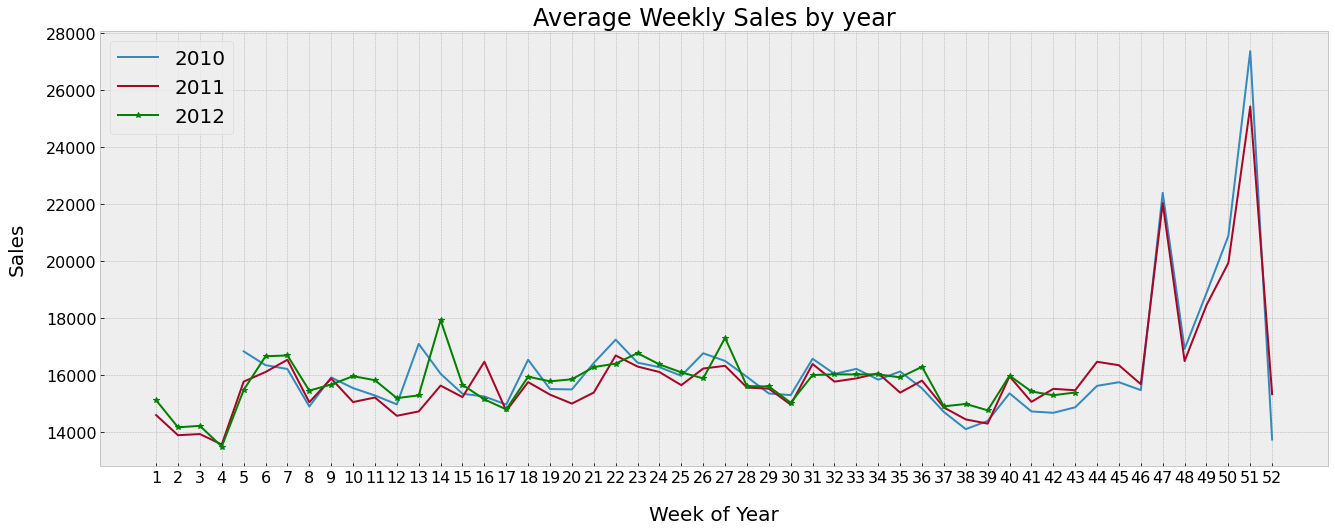

In [15]:
# Sales analysis by week
weekly_sales_2010 = final_df[final_df['Year']==2010].groupby('Week')['Weekly_Sales'].mean()
weekly_sales_2011 = final_df[final_df['Year']==2011].groupby('Week')['Weekly_Sales'].mean()
weekly_sales_2012 = final_df[final_df['Year']==2012].groupby('Week')['Weekly_Sales'].mean()

plt.figure(figsize=(22,8))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values)
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values)
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values, '*-g')

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Weekly Sales by year", fontsize=24)
plt.legend(['2010', '2011', '2012'], fontsize=20)                                                                                            

In [16]:
# Boxplot top 5 store analysis
best_stores = final_df[final_df['Store'].isin([20,4,14,13,2])]
fig = px.box(best_stores, y='Weekly_Sales', x='Store', color="Store", 
             title="Top 5 store distribution analysis",
             template='plotly+presentation',
             color_discrete_sequence = px.colors.qualitative.Set1)
            
fig.update_layout(
    title={
        'y':0.92,
        'x':0.5},
    font=dict(
        family='Trebuchet MS',
        size=15),
    legend={
        'y': 0.85,
        'x': 0.85,
        'xanchor': 'right',
        'yanchor': 'top'},
    yaxis_title = 'Sales',
    xaxis_title = 'Store',
    showlegend = False,
    xaxis=dict(type='category')
)

fig.update_xaxes(categoryorder='total descending')

fig.show()

In [17]:
# Holiday analysis
holiday = {6:"Super Bowl", 36:"Labor day", 47:"Thanksgiving", 51:"Christmas"}

#sales average by holiday
holidays = final_df[final_df["Week"].isin([6,36,47,51])]
holiday_mean = holidays[["Weekly_Sales", "Week"]].groupby("Week").mean().reset_index().sort_values('Weekly_Sales', ascending=False)
holiday_mean = holiday_mean.rename(columns={"Week":"Holiday"})
holiday_mean["Holiday"] = holiday_mean["Holiday"].map(holiday)
holiday_mean

#TODO: Holidays affect sales? Check with ANOVA

,Holiday,Weekly_Sales
3,Christmas,26396.399283
2,Thanksgiving,22220.944538
0,Super Bowl,16377.996441
1,Labor day,15881.693339


In [18]:
fig = px.bar(holiday_mean, x="Holiday", y="Weekly_Sales", 
             color="Holiday",
             title = 'Sales average by holiday',
             template = 'plotly+presentation',
             text_auto=".2s",
             color_discrete_sequence = px.colors.qualitative.Pastel)

fig.update_layout(
    title={
        'y':0.92,
        'x':0.5},
    font=dict(
        family='Trebuchet MS',
        size=15),
    yaxis_title = 'Sales',
    xaxis_title = 'Holiday',
)

fig.update_traces(textfont_size=14, 
                  textposition="inside", 
                  )


fig.show()

In [19]:
#Sales average analysis by holiday and year
hol_mean_year = holidays[["Weekly_Sales","Week", "Year"]].groupby(["Year","Week"]).mean().reset_index()
hol_mean_year = hol_mean_year.rename(columns={"Week":"Holiday"})
hol_mean_year["Holiday"] = hol_mean_year["Holiday"].map(holiday)
hol_mean_year

,Year,Holiday,Weekly_Sales
0,2010,Super Bowl,16352.056032
1,2010,Labor day,15537.758883
2,2010,Thanksgiving,22403.336705
3,2010,Christmas,27378.692693
4,2011,Super Bowl,16111.706191
5,2011,Labor day,15809.069483
6,2011,Thanksgiving,22043.563476
7,2011,Christmas,25437.146122
8,2012,Super Bowl,16664.247891
9,2012,Labor day,16294.692957


In [20]:
fig = px.histogram(hol_mean_year, x='Year', y="Weekly_Sales", color="Holiday", histfunc = "sum",
                   height=600, 
                   barmode='group', 
                   title='Sales average by holiday and year',
                   template = 'plotly+presentation',
                   text_auto=".4s",
                   color_discrete_sequence = px.colors.qualitative.Pastel)

fig.update_layout(
    title={
        'y':0.92,
        'x':0.5},
    font=dict(
        family='Trebuchet MS',
        size=15),
    yaxis_title = 'Sales',
    xaxis_title = 'Year'
)

fig.update_traces(textfont_size=12, 
                  textposition='outside')

fig.show()

In [21]:
#Relationship analysis
analysis_2011 = final_df.query('Year== 2011') # = #temp_2011 = final_df[final_df['Year'] == 2011]
temp_2011 = analysis_2011[['Temperature', 'Weekly_Sales']].groupby('Temperature').sum()

In [22]:
fig = go.Figure()

fig.add_trace(
    go.Scattergl(
        x=analysis_2011['Temperature'], y=analysis_2011["Weekly_Sales"],
        mode = 'markers',
        marker = dict(
            line = dict(
                width = 1)
        )
    )
)


fig.update_layout(
    template = 'plotly+presentation',
    title={
        'text': 'Sales by temperature in 2011',
        'y':0.92,
        'x':0.5},
    font=dict(
        family='Trebuchet MS',
        size=15),
    yaxis_title = 'Sales',
    xaxis_title = 'Temperature (°F)',
)
fig.show()

Text(0, 0.5, 'Sales')

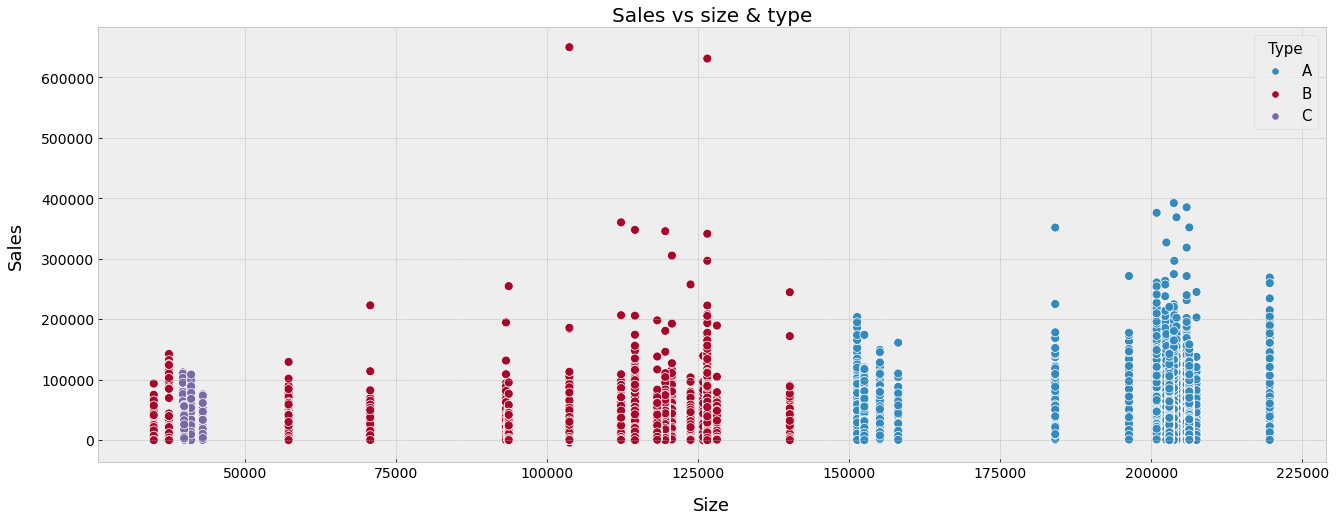

In [23]:
#Relationship analysis: sales vs size and type in 2011
plt.figure(figsize=(22,8))

sns.scatterplot(x=analysis_2011['Size'], y=analysis_2011['Weekly_Sales'], hue=analysis_2011['Type'], s=80)

plt.title("Sales vs size & type", fontsize=20)
plt.xticks( fontsize=14)
plt.yticks( fontsize=14)
plt.xlabel('Size', fontsize=18, labelpad=16)
plt.ylabel('Sales', fontsize=18, labelpad=16)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



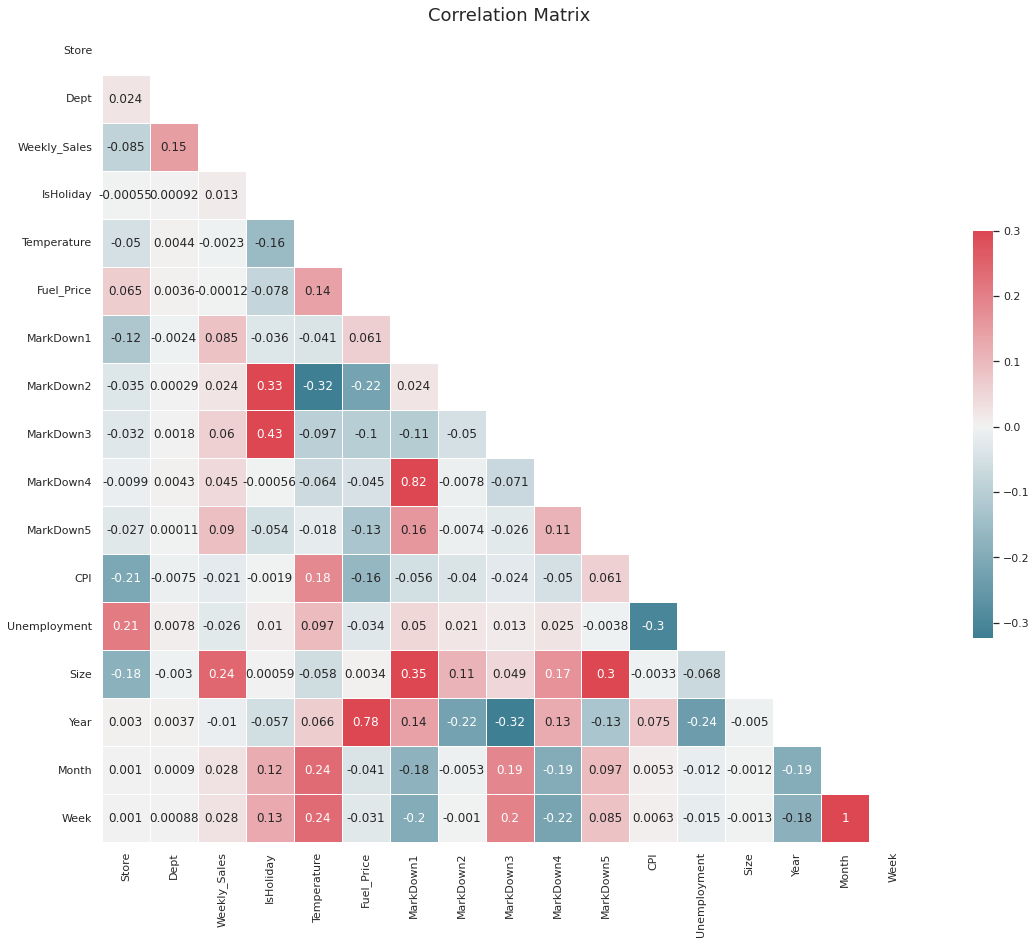

In [24]:
#Correlation analysis

sns.set(style="white")

corr = final_df.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.subplots(figsize=(20, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title('Correlation Matrix', fontsize=18)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()